<h4>Problem Statement - After running a successful pilot phase, a cab company wants to employ a model which predicts the cab fares for various trips within the city.</h4><br>
<li>Dataset - Cab Fare Training Data</li>
<li>Variables - 7 (6 independent and 1 dependent)</li>
<li>Dep. Variable - Fare Amount (Continuous)</li>
<li>Observations - 16067</li>

<h4> Setting the working directory and importing dataset </h4>

In [1]:
import os

os.getcwd() # Fetching current working directory
path = '/Users/chinmaygovilkar/OneDrive/EdWisor Assignments/Project - 1' # Storing the directory path
os.chdir(path) # Setting the new working directory
os.getcwd() # Checking if the new directory is successfully set

'/Users/chinmaygovilkar/OneDrive/EdWisor Assignments/Project - 1'

<h4>Importing the train & test dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import scipy.stats as stats
from matplotlib import pyplot as plt
%matplotlib inline

train_cab = pd.read_csv('train_cab.csv') # Importing the train dataset
test_cab = pd.read_csv('test.csv')

The train & test datasets have been successfully imported.

Let us check the variables from each one of them

<h4>Train Data</h4>

fare_amount --> This is our dependent variable, which we have to predict<br>
pickup_datetime --> The pickup date & timestamp at the time of trip<br>
pickup_longitude --> The longitudinal location of pickup<br>
pickup_latitude --> The latitudinal location of pickup<br>
dropoff_longitude --> The longitudinal location of pickup<br>
dropoff_latitude --> The latitudinal location of pickup<br>
passenger_count --> The count of passengers during the trip<br>

<h4>Test Data</h4>

All the variables are same except the fare_amount variable. As the predictions from our model will be added later to this dataset.

In [3]:
train_cab.head() # Viewing the first 5 rows of our imported dataset with head

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


As we can see, the pickup datetime contains string & thus is in datatype object. In order to fetch time & date related information from it, we must convert it to datetime format & for both datasets.

<h4>1. Data pre-processing </h4>

In [4]:
datasets = [train_cab, test_cab]
for i in datasets:
    i['pickup_datetime'] = pd.to_datetime(i['pickup_datetime'], errors = "coerce")

# Errors = coerce will replace any errors as NaN, which we can later remove as NA's.

To ensure, we have correctly converted the datatype of datetime in both datasets, lets check the head

In [5]:
train_cab.head() # The UTC string from before conversion has been removed

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0


Let us check the dataset information & spread of the variables for both train & test

In [6]:
train_cab.info() # Information about variables & their datatypes of train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   fare_amount        16043 non-null  object             
 1   pickup_datetime    16066 non-null  datetime64[ns, UTC]
 2   pickup_longitude   16067 non-null  float64            
 3   pickup_latitude    16067 non-null  float64            
 4   dropoff_longitude  16067 non-null  float64            
 5   dropoff_latitude   16067 non-null  float64            
 6   passenger_count    16012 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(1)
memory usage: 878.8+ KB


In [7]:
test_cab.info() # Information about variables & their datatypes of test dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 1   pickup_longitude   9914 non-null   float64            
 2   pickup_latitude    9914 non-null   float64            
 3   dropoff_longitude  9914 non-null   float64            
 4   dropoff_latitude   9914 non-null   float64            
 5   passenger_count    9914 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(1)
memory usage: 464.8 KB


In [8]:
train_cab.describe() # Displays statistical information of the train dataset with mean, median, stdev & IQR values

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [9]:
test_cab.describe() # Displays statistical information of the test dataset with mean, median, stdev & IQR values

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [10]:
train_cab.dtypes # Displays the datatypes for each column in train dataset

fare_amount                       object
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                  float64
dtype: object

In [11]:
test_cab.dtypes # Displays the datatypes for each column in test dataset

pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In order to extract meaningful information from the dataset, it is important to extract the datetime parameters

In [12]:
#train_cab["pickup_day"]=train_cab["pickup_datetime"].apply(lambda x:x.day)
#train_cab["pickup_month"]=train_cab["pickup_datetime"].apply(lambda x:x.month)
train_cab["pickup_day"] = train_cab["pickup_datetime"].dt.day
train_cab["pickup_year"] = train_cab["pickup_datetime"].dt.year
train_cab["pickup_dow"] = train_cab["pickup_datetime"].dt.dayofweek
train_cab["pickup_hour"] = train_cab["pickup_datetime"].dt.hour
train_cab["pickup_month"] = train_cab["pickup_datetime"].dt.month

In [13]:
train_cab.head() # Checking the dataset size & no of variables

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_year,pickup_dow,pickup_hour,pickup_month
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,15.0,2009.0,0.0,17.0,6.0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,5.0,2010.0,1.0,16.0,1.0
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,18.0,2011.0,3.0,0.0,8.0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,21.0,2012.0,5.0,4.0,4.0
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,9.0,2010.0,1.0,7.0,3.0


<h4>2. Data cleaning </h4>

As the problem is of common knowledge & variables are easily interpretable, we'll apply the manual outlier detection & capping method & check for missing data

In [14]:
train_cab.isnull().sum() # Checking for missing data in our train dataset

fare_amount          24
pickup_datetime       1
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
pickup_day            1
pickup_year           1
pickup_dow            1
pickup_hour           1
pickup_month          1
dtype: int64

As the missing data is less than 1% of the total dataset size, we'll drop the observations with missing values

In [15]:
train_cab.dropna(inplace = True) # Removing the missing observations.

The primary indicators when predicting the fare amount of a cab fare are <b>distaince travelled</b>, <b>time of the day</b> and <b>day of the week</b>. Further more, tracking the manual latitude & longitudes for a place is not practical & out of the scope for this project. Thus we'll convert the co-ordinates to distance in kms. But before we do that let us eliminate out of range coordinates i.e. values beyond -90 to -180

In [16]:
sum(train_cab['pickup_longitude']>180) # No values outside the specified range
sum(train_cab['pickup_longitude']<-180) # No values outside the specified range
sum(train_cab['pickup_latitude']>90) # 1 value outside the specified range --> Needs to be removed
sum(train_cab['pickup_latitude']<-90) # No values outside the specified range
sum(train_cab['dropoff_longitude']>180) # No values outside the specified range
sum(train_cab['dropoff_longitude']<-180) # No values outside the specified range
sum(train_cab['dropoff_latitude']>90) # No values outside the specified range
sum(train_cab['dropoff_latitude']<-90) # No values outside the specified range

0

We'll also need to remove values whose latitude & longitude coordinates are 0

In [17]:
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    print(i,'equal to 0={}'.format(sum(train_cab[i]==0)))

pickup_longitude equal to 0=313
pickup_latitude equal to 0=313
dropoff_longitude equal to 0=312
dropoff_latitude equal to 0=310


In [18]:
train_cab = train_cab.drop(train_cab[train_cab['pickup_latitude']>90].index, axis=0)
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    train_cab = train_cab.drop(train_cab[train_cab[i]==0].index, axis=0)

In [19]:
train_cab.shape

(15662, 12)

We've successfully removed erratic entries from our co-ordinates & now we can calculate the distance between those coordinates in kms using the haversine formula.

In [20]:
#! pip install geopy
import geopy.distance
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1 = a[0]
    lat1 = a[1]
    lon2 = a[2]
    lat2 = a[3]
    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    km = r * c
    return km

We've executed the function and it is ready to be applied to our coordinates.

In [21]:
train_cab['distance']= train_cab[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine, axis=1)

In [22]:
train_cab.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_year,pickup_dow,pickup_hour,pickup_month,distance
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,15.0,2009.0,0.0,17.0,6.0,1.030764
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,5.0,2010.0,1.0,16.0,1.0,8.450134
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,18.0,2011.0,3.0,0.0,8.0,1.389525
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,21.0,2012.0,5.0,4.0,4.0,2.799270
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,9.0,2010.0,1.0,7.0,3.0,1.999157


Now that we have added the distance variable, we have the most important variables for prediction of fare.

So we'll now clean the <b>passenger count</b>, <b>fare amount</b>, <b>distance</b> variables

<li>Passenger Count - cleanup</li>

In [23]:
train_cab['passenger_count'].describe() # Checking the passenger count for erratic values

count    15662.000000
mean         2.626141
std         61.488762
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

The <b>two</b> main observations show, the min value as 0 & max value as 5345, both of which are impossible. However it is still possible, we find more such values, thus to better understand, we'll sort the column

In [24]:
train_cab['passenger_count'].sort_values(ascending = True)

11803       0.0
1935        0.0
7279        0.0
5058        0.0
10663       0.0
          ...  
8506      537.0
971       554.0
8985      557.0
293      5334.0
1146     5345.0
Name: passenger_count, Length: 15662, dtype: float64

There are multiple observations with count 0 & count which is extremely high. Let us consider the threshold of 6 passengers, beyond which won't fit in a single cab & remove all such observations from our dataset

In [25]:
train_cab = train_cab.drop(train_cab[train_cab["passenger_count"]> 6 ].index, axis=0)

In [26]:
train_cab = train_cab.drop(train_cab[train_cab['passenger_count']==0 ].index, axis=0)

Next, we'll check our variable for decimal values, which also are impossible for passenger counts.

In [27]:
train_cab = train_cab.drop(train_cab[train_cab['passenger_count']==0.12 ].index, axis=0)

<li>Fare amount - cleanup</li>

In [28]:
train_cab['fare_amount'].describe()

count     15589
unique      461
top         6.5
freq        741
Name: fare_amount, dtype: object

In [29]:
train_cab['fare_amount'].sort_values(ascending = True) # Check the fare amount value for negative & zero values

2486     -2.5
2039     -2.9
13032      -3
10002       0
2780     0.01
         ... 
14540     9.7
39        9.8
7331      9.8
7810       95
12915      96
Name: fare_amount, Length: 15589, dtype: object

In [30]:
train_cab['fare_amount'].sort_values(ascending = True).head(10)

2486     -2.5
2039     -2.9
13032      -3
10002       0
2780     0.01
1427     1.14
11886      10
8137       10
5114       10
8752       10
Name: fare_amount, dtype: object

In [31]:
train_cab["fare_amount"] = pd.to_numeric(train_cab["fare_amount"],errors = "coerce")

In [32]:
train_cab = train_cab.drop(train_cab[train_cab["fare_amount"]< 0 ].index, axis=0)

In [33]:
train_cab = train_cab.drop(train_cab[train_cab["fare_amount"]< 1 ].index, axis=0)

In [34]:
train_cab.dropna(inplace = True)

In [35]:
train_cab.shape

(15583, 13)

In [36]:
train_cab['fare_amount'].sort_values(ascending = False).head(10)

1015     54343.00
1072      4343.00
607        453.00
980        434.00
1335       180.00
1483       165.00
14142      108.00
12349      104.67
12915       96.00
7810        95.00
Name: fare_amount, dtype: float64

As we observe, the difference between the maximum values of the column are huge, thus will be removed.

In [37]:
train_cab = train_cab.drop(train_cab[train_cab["fare_amount"]> 454 ].index, axis=0)

<li>Distance - cleanup </li>

In [38]:
train_cab['distance'].describe()

count    15581.000000
mean         4.041421
std         56.319503
min          0.000000
25%          1.257565
50%          2.171797
75%          3.901998
max       5420.988959
Name: distance, dtype: float64

In [39]:
train_cab['distance'].sort_values(ascending = True)

8068        0.000000
1222        0.000000
1214        0.000000
10485       0.000000
10524       0.000000
            ...     
11619     127.509261
14536     129.560455
10710     129.950482
7014     4447.086698
5864     5420.988959
Name: distance, Length: 15581, dtype: float64

In [40]:
train_cab = train_cab.drop(train_cab[train_cab['distance']== 0 ].index, axis=0)

In [41]:
train_cab = train_cab.drop(train_cab[train_cab['distance']< 0 ].index, axis=0)

In [42]:
train_cab['distance'].sort_values(ascending = False)

5864     5420.988959
7014     4447.086698
10710     129.950482
14536     129.560455
11619     127.509261
            ...     
13488       0.000344
510         0.000279
15366       0.000238
13582       0.000202
15490       0.000111
Name: distance, Length: 15426, dtype: float64

In [43]:
train_cab = train_cab.drop(train_cab[train_cab['distance']> 130 ].index, axis=0)

We have successfully manually treated outliers & missing values from our train dataset. We'll repeat the process for test data too. Also, we initially derived a few variables & extrated information from the existing ones, therefore, we have a redundancy in our data which we no longer need.

In [44]:
to_drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude']
train_cab = train_cab.drop(to_drop, axis = 1)

In [45]:
train_cab.shape

(15424, 8)

In [46]:
train_cab.head()

,fare_amount,passenger_count,pickup_day,pickup_year,pickup_dow,pickup_hour,pickup_month,distance
0,4.5,1.0,15.0,2009.0,0.0,17.0,6.0,1.030764
1,16.9,1.0,5.0,2010.0,1.0,16.0,1.0,8.450134
2,5.7,2.0,18.0,2011.0,3.0,0.0,8.0,1.389525
3,7.7,1.0,21.0,2012.0,5.0,4.0,4.0,2.799270
4,5.3,1.0,9.0,2010.0,1.0,7.0,3.0,1.999157


<h4> The data cleanup & pre-processing of train dataset is complete, we'll now pre-process our test dataset & keep it ready for once we finish our modelling.

In [47]:
test_cab.head() # Checking the initial 5 rows of the test data.

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1


In [48]:
test_cab.describe() # Describing the statistics of the test data

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


We observe that the test data already has a column fare_amount missing, as once our model selection process is complete, we'll test our model with this data where we'll add our predictions to this dataset. We'll first convert the datatime object as we did for train & fetch relevant information from it.

In [49]:
test_cab["pickup_day"] = test_cab["pickup_datetime"].dt.day
test_cab["pickup_year"] = test_cab["pickup_datetime"].dt.year
test_cab["pickup_dow"] = test_cab["pickup_datetime"].dt.dayofweek
test_cab["pickup_hour"] = test_cab["pickup_datetime"].dt.hour
test_cab["pickup_month"] = test_cab["pickup_datetime"].dt.month

In [50]:
test_cab.head() # Checking if the columns have been derived.

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_year,pickup_dow,pickup_hour,pickup_month
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,27,2015,1,13,1
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,27,2015,1,13,1
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,8,2011,5,11,10
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,1,2012,5,21,12
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,1,2012,5,21,12


In [51]:
test_cab['distance']= test_cab[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine, axis=1)

In [53]:
to_drop_test = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude']
test_cab = test_cab.drop(to_drop_test, axis = 1) # Dropping redundant columns from test data

In [54]:
train_cab.head() # Checking the head of train data

,fare_amount,passenger_count,pickup_day,pickup_year,pickup_dow,pickup_hour,pickup_month,distance
0,4.5,1.0,15.0,2009.0,0.0,17.0,6.0,1.030764
1,16.9,1.0,5.0,2010.0,1.0,16.0,1.0,8.450134
2,5.7,2.0,18.0,2011.0,3.0,0.0,8.0,1.389525
3,7.7,1.0,21.0,2012.0,5.0,4.0,4.0,2.799270
4,5.3,1.0,9.0,2010.0,1.0,7.0,3.0,1.999157


In [56]:
test_cab.head() # Checking the head of test data

,passenger_count,pickup_day,pickup_year,pickup_dow,pickup_hour,pickup_month,distance
0,1,27,2015,1,13,1,2.323259
1,1,27,2015,1,13,1,2.425353
2,1,8,2011,5,11,10,0.618628
3,1,1,2012,5,21,12,1.961033
4,1,1,2012,5,21,12,5.387301


In [63]:
train_cab.dtypes

fare_amount        float64
passenger_count      int64
pickup_day           int64
pickup_year          int64
pickup_dow           int64
pickup_hour          int64
pickup_month         int64
distance           float64
dtype: object

In [64]:
test_cab.dtypes

passenger_count      int64
pickup_day           int64
pickup_year          int64
pickup_dow           int64
pickup_hour          int64
pickup_month         int64
distance           float64
dtype: object

After removing the redundant columns, converting the derived features to int

In [62]:
train_cab['passenger_count'] = train_cab['passenger_count'].astype(int)
train_cab['pickup_day'] = train_cab['pickup_day'].astype(int)
train_cab['pickup_year'] = train_cab['pickup_year'].astype(int)
train_cab['pickup_dow'] = train_cab['pickup_dow'].astype(int)
train_cab['pickup_hour'] = train_cab['pickup_hour'].astype(int)
train_cab['pickup_month'] = train_cab['pickup_month'].astype(int)

<h3>Exploratory Data Analysis</h3>
<br>
<li>Univariate & Bi-variate Plots</li>
<li>Distribution Plots</li>


<AxesSubplot:xlabel='passenger_count', ylabel='count'>

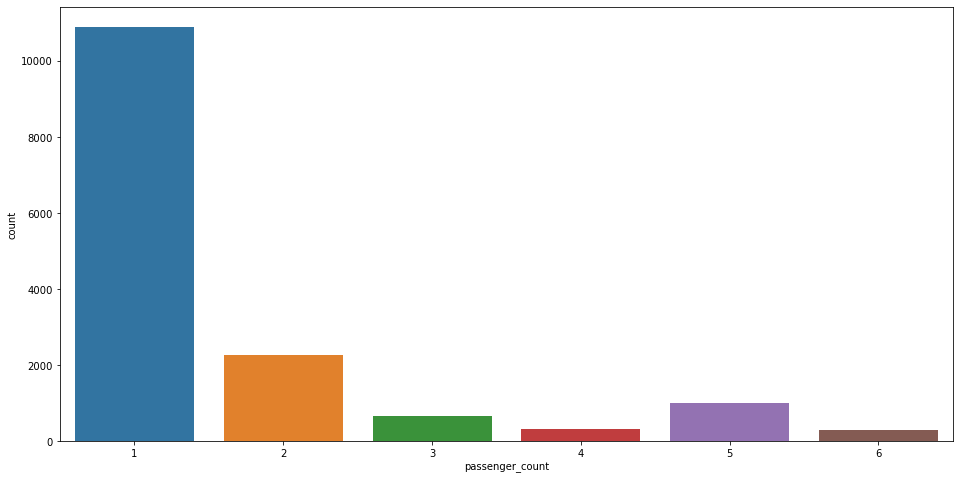

In [65]:
plt.figure(figsize=(16,8))
sns.countplot(x="passenger_count", data=train_cab)

<li>The observations show that, more than 10K+ trips have had only 1 passenger occupancy</li><br>
<li>The next best occupancy of 2 only accounted for ~2K trips</li><br>
<li>Number of trips with 3 passengers is approximately 600</li><br>
<li>Trips with 4 passengers are the least with ~300 trips</li><br>
<li>We see a rise in number of trips with 5 passengers, may account for family or group of friends</li><br>
<li>With maximum of 6 passengers the trips drop to ~250 trips</li>

<AxesSubplot:xlabel='pickup_year', ylabel='count'>

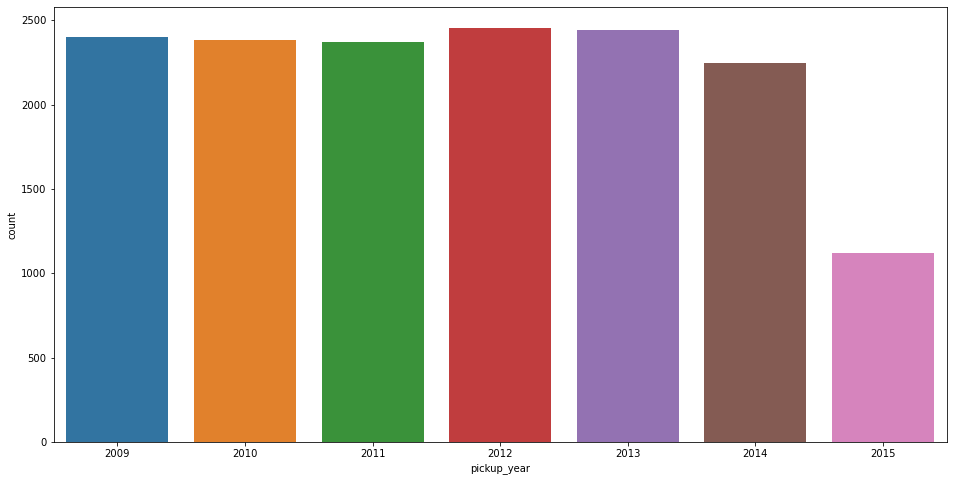

In [66]:
plt.figure(figsize=(16,8))
sns.countplot(x="pickup_year", data=train_cab)

<li>The above plot shows the number of trips every year</li><br>
<li>The distribution of trips each year is ~2350 trips</li><br>
<li>The year 2015, shows ~1100 trips only, could be due to no further data as it is the last year</li><br>
<li>The years 2012 and 2013 show higher trips compared to other years</li><br>
<li>The year 2012 marks the most trips in a single year</li><br>

<AxesSubplot:xlabel='pickup_day', ylabel='count'>

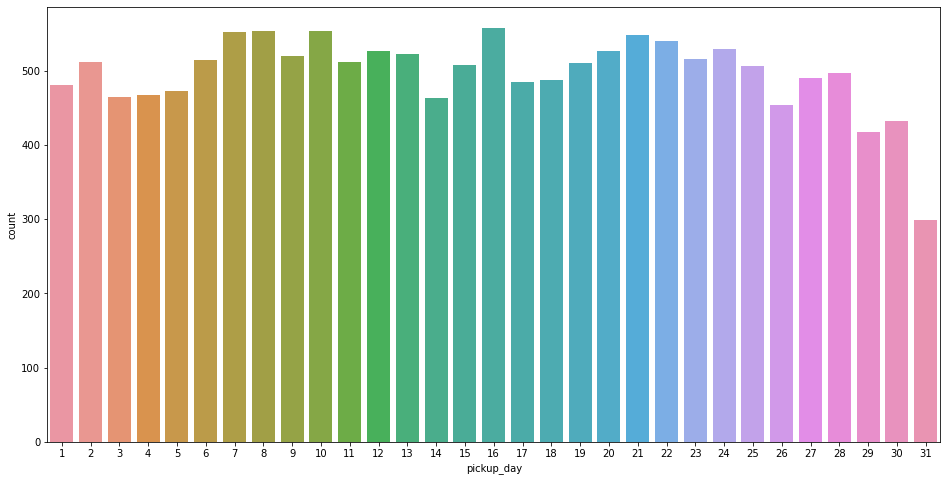

In [67]:
plt.figure(figsize=(16,8))
sns.countplot(x="pickup_day", data=train_cab)

<li>The above plot shows the distribution of trips made every day of the month over the years</li><br>
<li>The number of trips made tend to reduce as the month end nears</li><br>
<li>Week 2 shows the highest number of trips made each month</li><br>
<li>Maximum trips are done on 16th of each month over the years</li><br>

<AxesSubplot:xlabel='pickup_dow', ylabel='count'>

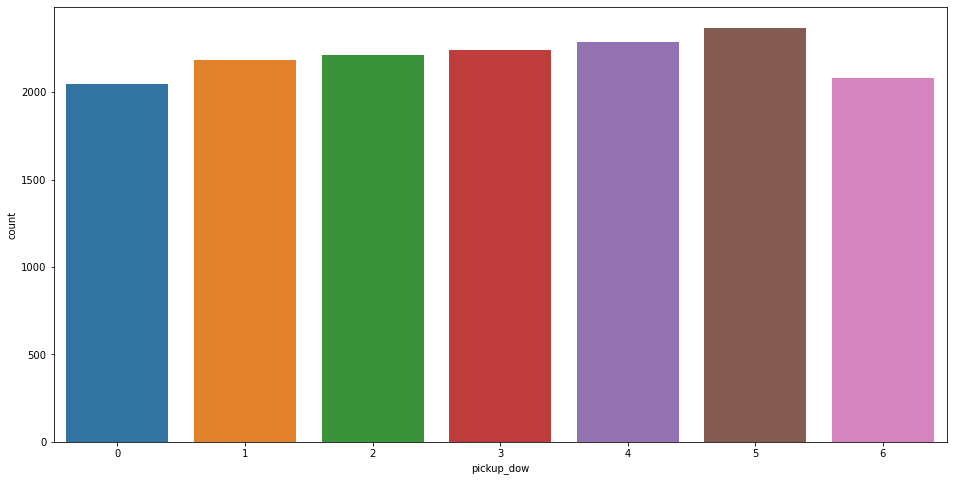

In [68]:
plt.figure(figsize=(16,8))
sns.countplot(x="pickup_dow", data=train_cab)

<li>The above plot shows the distribution of trips over the days of the week</li><br>
<li>Monday sees the lowest number of trips as it marks the beginning of the work week</li><br>
<li>Number of trips gradually increase with days of the week</li><br>
<li>Friday and Saturday mark the peak days with highest number of days</li><br>
<li>Saturday marks the most trips made as it is the weekend and followed by Sunday</li><br>
<li>Sunday also is on lower side of trips made as most people avoid travelling on sundays</li>

<AxesSubplot:xlabel='pickup_hour', ylabel='count'>

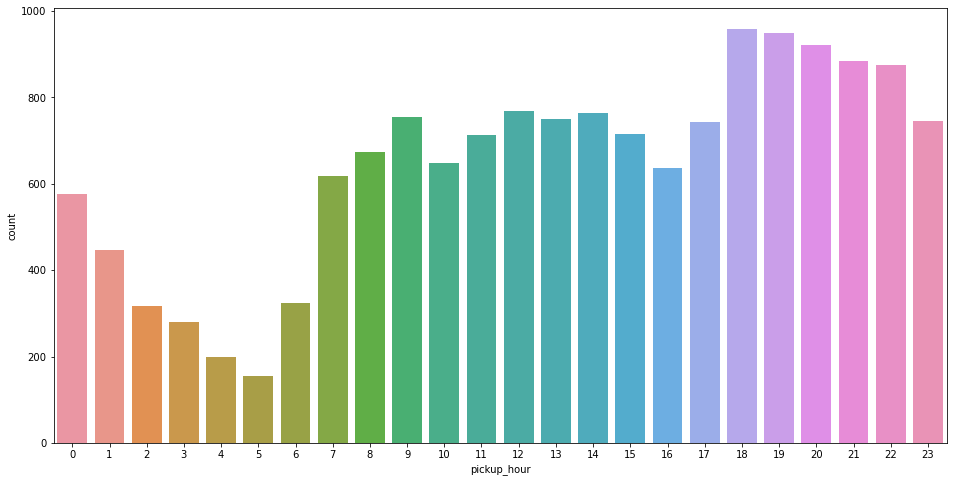

In [69]:
plt.figure(figsize=(16,8))
sns.countplot(x="pickup_hour", data=train_cab)

<li>The above plot represents the pickup hours of a day over the span of 6 years</li><br>
<li>To no surprise, hours from midnight to 5 AM have the fewest number of pickups in a day</li><br>
<li>Considering 6 AM as the beginning of the day, pickups start to increase</li><br>
<li>Again 7 to 9 AM see a massive spike in number of pickups as the routine work hour starts</li><br>
<li>From 10 AM to 4 PM, the pickups continue to remain constant, possibly to and fro trips in city</li><br>
<li>As in the morning, pickups start to rise from 5 PM onwards</li><br>
<li>6 PM marks the highest number of people boarding cabs from all over the city</li><br>
<li>The pickups are very high from 6 PM to 10 PM, the working class returning back home</li><br>
<li>Pickups from 11 PM and midnight could represent young crowds enjoying nightlife</li>

Moving to bi-variate analysis to better understand the relationship between our variables

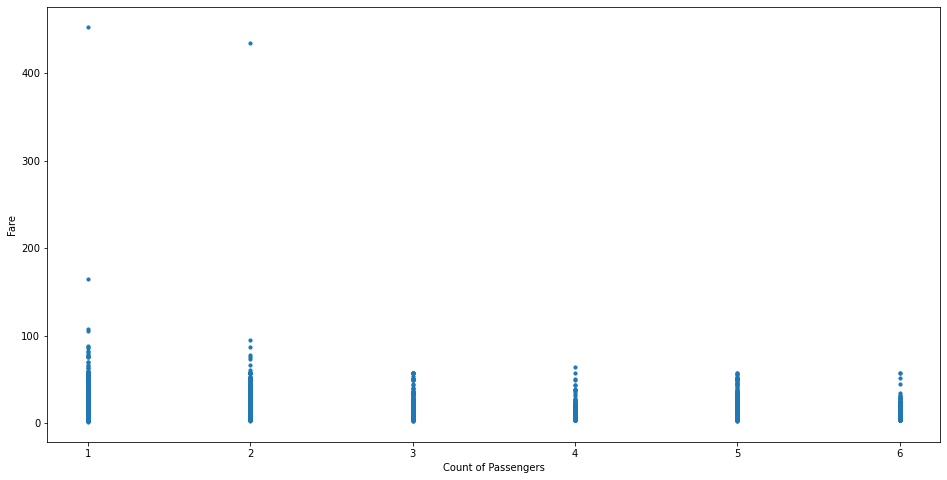

In [72]:
plt.figure(figsize=(16,8))
plt.scatter(x=train_cab['passenger_count'], y=train_cab['fare_amount'], s=10)
plt.xlabel('Count of Passengers')
plt.ylabel('Fare')
plt.show()

The above plot represents, count of passengers against fare.

As already seen, maximum trips are represented by 1 and 2 passengers only, they are the ones who are contributing to maximum revenue to the taxi company

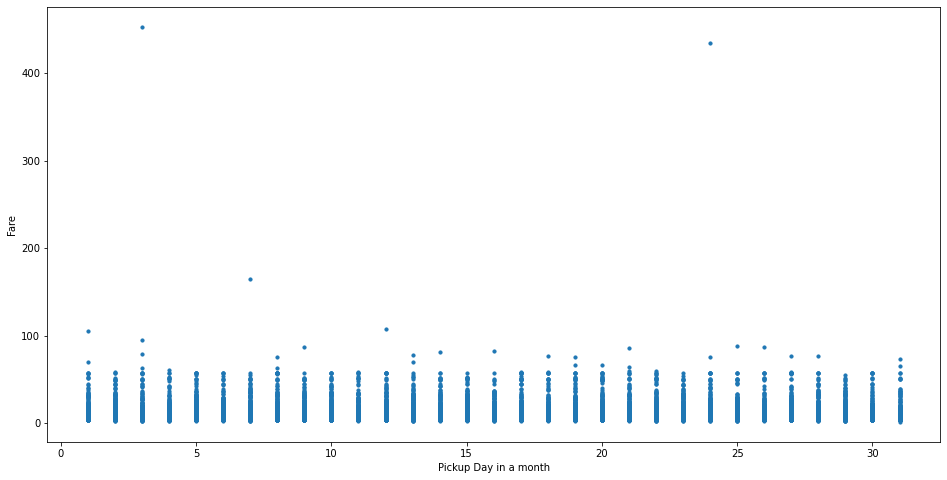

In [73]:
plt.figure(figsize=(16,8))
plt.scatter(x=train_cab['pickup_day'], y=train_cab['fare_amount'], s=10)
plt.xlabel('Pickup Day in a month')
plt.ylabel('Fare')
plt.show()

The above plot shows the correlation between the day of the month & fare

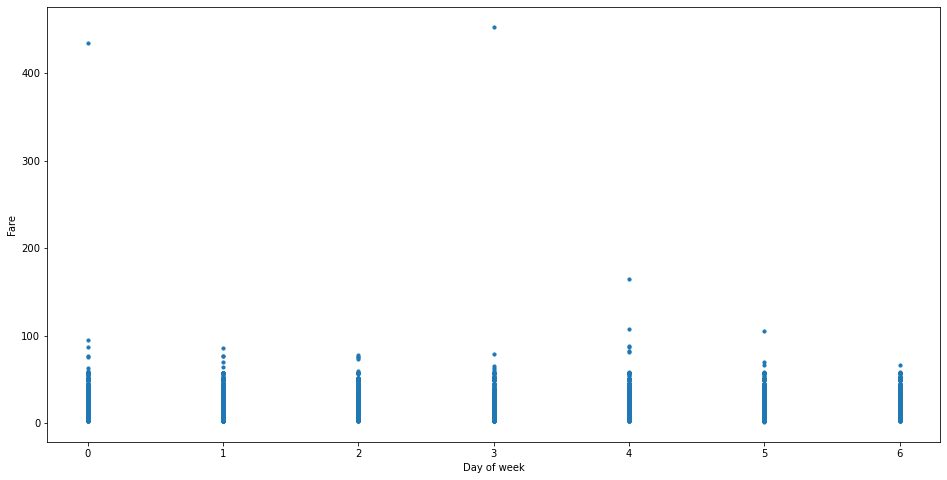

In [74]:
plt.figure(figsize=(16,8))
plt.scatter(x=train_cab['pickup_dow'], y=train_cab['fare_amount'], s=10)
plt.xlabel('Day of week')
plt.ylabel('Fare')
plt.show()

The above plot represents the day of the week against fare. Fridays & Saturdays account for maximum fare generation throughout the weeks over the years, which is pretty normal the weekend nears

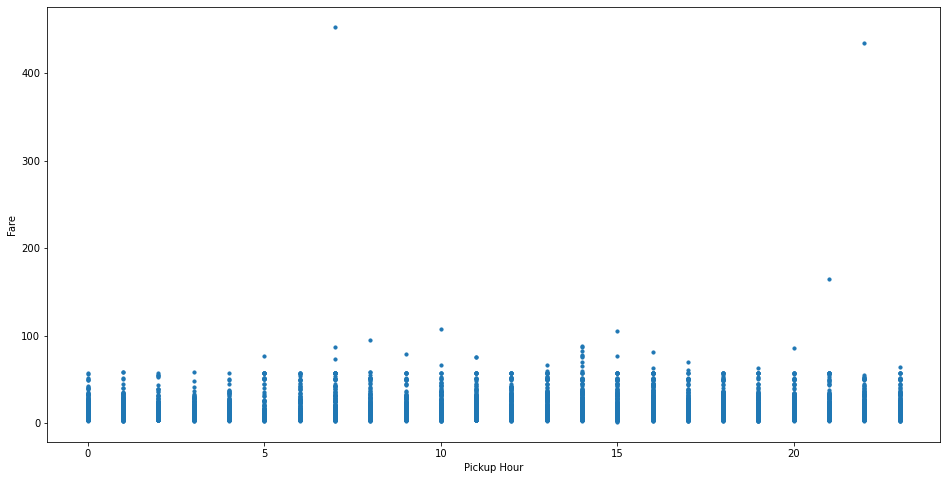

In [75]:
plt.figure(figsize=(16,8))
plt.scatter(x=train_cab['pickup_hour'], y=train_cab['fare_amount'], s=10)
plt.xlabel('Pickup Hour')
plt.ylabel('Fare')
plt.show()

The above plot shows the correlation between pickup time & fare. The pickups taken between 7 AM and 10 AM along with pickups from 9 PM are high in cost. One thing to note is that even though the count of trips made from 5 PM to 11 PM were highest, the fare is not increasing proportionately. This may indicate, high availability of cabs during peak hours.

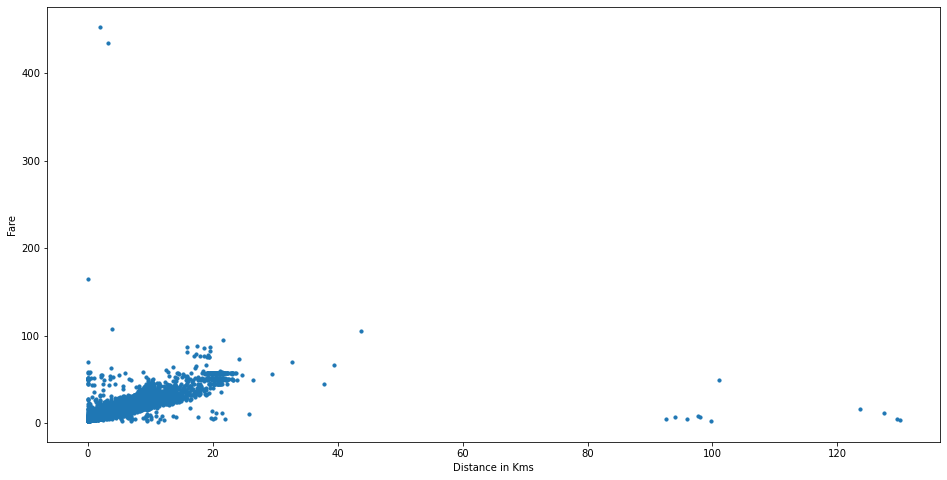

In [87]:
plt.figure(figsize=(16,8))
plt.scatter(x=train_cab['distance'], y=train_cab['fare_amount'], s=10)
plt.xlabel('Distance in Kms')
plt.ylabel('Fare')
plt.show()

Coming to the most important of correlations, between distance travelled and fare. Most of the trips are fewer than 20 kms which account for trip fares upto 100$. However a few trips cost a lot higher even though the distance travelled is pretty much the same, this may mean the peak charges are levied. Trips marking 120+ kms in distance but fares such low indicate error entries.

Now, we'll check for distribution of data, whether normally distributed or not.

fare_amount


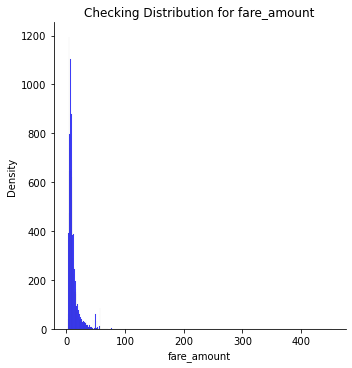

distance


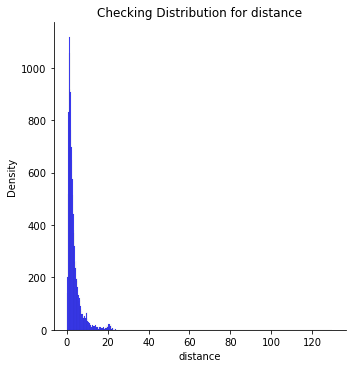

In [89]:
for i in ['fare_amount', 'distance']:
    print(i)
    sns.displot(train_cab[i],bins='auto',color='blue')
    plt.title("Checking Distribution for "+i)
    plt.ylabel("Density")
    plt.show()

Both these plots show a strong right tail i.e. positive skew. Therefore, we'll need to apply normality by log transformation to bring the data to a normalised bell curve.

In [90]:
train_cab['fare_amount'] = np.log1p(train_cab['fare_amount']) # Apply log transformation to fare amount
train_cab['distance'] = np.log1p(train_cab['distance']) # Apply log transformation to distance

fare_amount


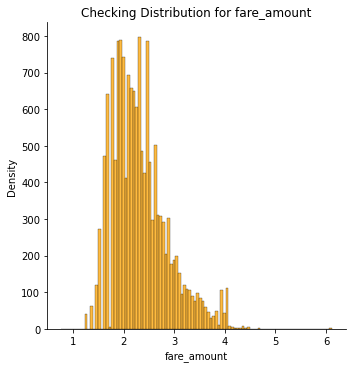

distance


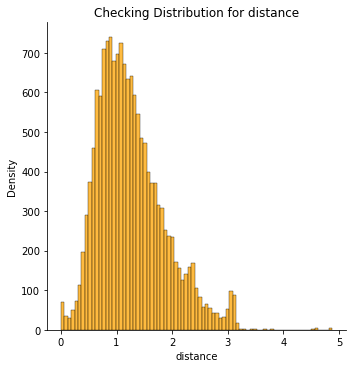

In [91]:
for i in ['fare_amount', 'distance']:
    print(i)
    sns.displot(train_cab[i],bins='auto',color='orange')
    plt.title("Checking Distribution for "+i)
    plt.ylabel("Density")
    plt.show()

Now we'll first check the normality distribution of test data & apply log transformation if need be

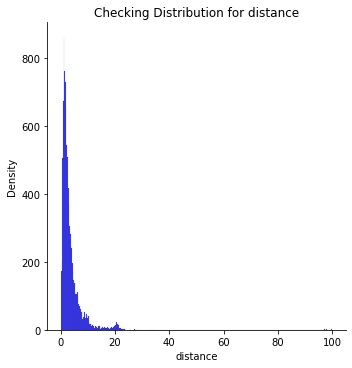

In [93]:
sns.displot(test_cab['distance'],bins='auto',color='blue')
plt.title("Checking Distribution for distance")
plt.ylabel("Density")
plt.show()

The test data too shows a similar positive skew and thus we'll apply the log transformation here as well.

In [94]:
test_cab['distance'] = np.log1p(test_cab['distance']) # Apply log transformation to distance in test data

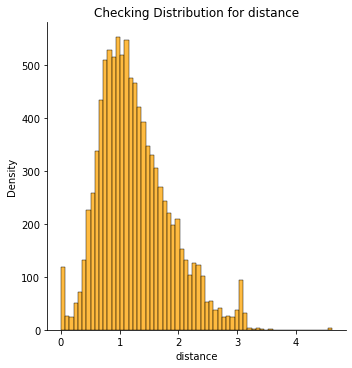

In [96]:
sns.displot(test_cab['distance'],bins='auto',color='orange')
plt.title("Checking Distribution for distance")
plt.ylabel("Density")
plt.show()

<h3>Model Building</h3>

As this is a continuous variable which we have to predict, the problem is a regression problem. The basic first algorithm which we'll build & train our model on is Linear Regression. But before we model our data, we'll need to split the train dataset in train to train the model on & test to check the model fit.

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_cab.iloc[:, train_cab.columns != 'fare_amount'], 
                         train_cab.iloc[:, 0], test_size = 0.25, random_state = 1)

In [99]:
X_train.shape # Checking the train dataset shape with 75% of data

(11568, 7)

In [100]:
X_test.shape # Checking the test dataset shape with remaining 25% of data

(3856, 7)

In [101]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

<h2><li>Multiple Linear Regression</li></h2>

In [102]:
fit_MLR = LinearRegression().fit(X_train , y_train) # Fitting the data with linear model

We've fitted our train data with multiple linear regression, now we'll check the fit. How well is our model predicting?

In [103]:
pred_train_MLR = fit_MLR.predict(X_train) # First we'll predict on train data

In [104]:
pred_test_MLR = fit_MLR.predict(X_test) # Now we'll predict on test data

We've stored our predictions for both train and test data in pred_MLR objects. We'll run the following error metrics to check how well is our model fitting with the data.

<li>Mean Absolute Error - MAE</li><br>
<li>Mean Squared Error - MSE</li><br>
<li>Root Mean Squared Error - RMSE</li><br>
<li>R-Squared</li>

We'll start with MAE and proceed subsequently.

In [106]:
from sklearn.metrics import mean_absolute_error

MAE_train = mean_absolute_error(y_train, pred_train_MLR) # Calculating the MAE for train dataset

In [109]:
MAE_test = mean_absolute_error(y_test, pred_test_MLR) # Calculating the MAE for test dataset

<h4>Mean Absolute Error</h4>

In [107]:
MAE_train # Mean Absolute Error for train dataset is 0.1748

0.17481429510212954

In [110]:
MAE_test # Mean Absolute Error for train dataset is 0.1702

0.1702912247123009

<h4>Mean Squared Error</h4>

In [111]:
from sklearn.metrics import mean_squared_error

MSE_train = mean_squared_error(y_train, pred_train_MLR) # Calculating the MSE for train dataset

In [112]:
MSE_test = mean_squared_error(y_test, pred_test_MLR) # Calculating the MSE for test dataset

In [113]:
MSE_train # Mean Squared Error for train dataset is 0.0752

0.07523843561983469

In [114]:
MSE_test # Mean Squared Error for the test dataset is 0.0650

0.06502275741736485

<h4>Root Mean Squared Error</h4>

In [120]:
RMSE_train = np.sqrt(MSE_train) # Calculating the RMSE for train dataset

In [121]:
RMSE_test = np.sqrt(MSE_test) # Calculating the RMSE for test dataset

In [122]:
RMSE_train # Root Mean Squared Error for train dataset is 0.274

0.2742962552056347

In [123]:
RMSE_test # Root Mean Squared Error for test dataset is 0.254

0.2549956027412333

<h4>Finally, Rˆ2 Value</h4>

In [125]:
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_MLR) # Calculating R-squared for train dataset

0.7504010484302029

In [171]:
r2_score(y_test, pred_test_MLR) # Calculating R-squared for test dataset

0.7724710664070347

We have successfully built a multiple linear regression model. Now we'll build advanced models - CART, Random Forest and Gradient Boost. We'll also first check multicollinearity, as if there exists high multicollinearity values, we can build Ridge & Lasso Regression models.

In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF
vif = pd.DataFrame()
vif["variables"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]

print(vif)

         variables        VIF
0  passenger_count   2.696984
1       pickup_day   4.238031
2      pickup_year  20.682281
3       pickup_dow   3.405728
4      pickup_hour   5.287242
5     pickup_month   4.292290
6         distance   5.312018


We observe that the pickup year has an extremely high value for VIF, which is mainly due to combination of hour, day, week and month, which all contribute toward yearly information.

Values of VIF 1-4 are acceptable and no action is required. 5-8 are on the higher side, needs a judgement call based on the problem statement. Any VIF value above 8 is high and must be treated.

<h2><li>CART - Regression Trees</li></h2>

In [141]:
fit_RT = DecisionTreeRegressor(random_state = 0)

In [142]:
fit_RT.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [143]:
pred_train_RT = fit_RT.predict(X_train) # First we'll predict on train data

In [145]:
pred_test_RT = fit_RT.predict(X_test) # Now we'll predict on test data

We know that, CART uses MSE to calculate the split decision. However we need to find out the MSE for each node split, we'll achieve that by using the tree_.impurity

In [146]:
split_MSE = fit_RT.tree_.impurity
print(split_MSE)

[0.30143731 0.1217219  0.09091809 ... 0.03108198 0.         0.        ]


We'll now visualize the split decisions

In [151]:
#! pip install graphviz
from sklearn import tree
import graphviz

split_MSE_viz = tree.export_graphviz(fit_RT, out_file=None, feature_names=X_train.columns)
graph = graphviz.Source(split_MSE_viz)

In [162]:
graph.render("Node_Split_RT")

'Node_Split_RT.pdf'

<h4>Mean Squared Error</h4>

In [163]:
MSE_train_RT = mean_squared_error(y_train, pred_train_RT) # Calculating the MSE for train dataset

In [164]:
MSE_test_RT = mean_squared_error(y_test, pred_test_RT) # Calculating the MSE for test dataset

In [165]:
MSE_train_RT # Mean Squared Error for train dataset is very low

8.669082172909849e-33

In [166]:
MSE_test_RT # Mean Squared Error for test dataset is 0.121

0.12148663499688737

<h4>Root Mean Squared Error</h4>

In [167]:
RMSE_train_RT = np.sqrt(MSE_train_RT) # Calculating the RMSE for train dataset

In [168]:
RMSE_test_RT = np.sqrt(MSE_test_RT) # Calculating the RMSE for train dataset

In [169]:
RMSE_train_RT # Mean Squared Error for train dataset is very low

9.310790607091242e-17

In [170]:
RMSE_test_RT # Mean Squared Error for test dataset is 0.348

0.3485493293593998

<h4>R-Squared</h4>

In [172]:
r2_score(y_train, pred_train_RT) # Calculating R-squared for train dataset

1.0

In [173]:
r2_score(y_test, pred_test_RT) # Calculating R-squared for test dataset

0.5748915363706545

It appears the RT model was not well built as we used the default parameters to build our model. Let us rebuild a better model with some basic parameters such as max_depth which will restrict the growth of the tree and avoid overfitting

In [210]:
fit_RT1 = DecisionTreeRegressor(max_depth = 5).fit(X_train, y_train)

In [211]:
pred_train_RT1 = fit_RT1.predict(X_train) # First we'll predict on train data

In [212]:
pred_test_RT1 = fit_RT1.predict(X_test) # Now we'll predict on test data

<h4>Mean Squared Error</h4>

In [213]:
MSE_train_RT1 = mean_squared_error(y_train, pred_train_RT1) # Calculating the MSE for train dataset

In [214]:
MSE_test_RT1 = mean_squared_error(y_test, pred_test_RT1) # Calculating the MSE for test dataset

In [215]:
MSE_train_RT1 # The MSE for train dataset with parameter tuning is 0.060

0.06066264528901891

In [216]:
MSE_test_RT1 # The MSE for test dataset with parameter tuning is 0.629

0.06290773210358472

<h4>Root Mean Squared Error</h4>

In [217]:
RMSE_train_RT1 = np.sqrt(MSE_train_RT1) # Calculating the RMSE for train dataset

In [218]:
RMSE_test_RT1 = np.sqrt(MSE_test_RT1) # Calculating the RMSE for test dataset

In [219]:
RMSE_train_RT1 # The RMSE for train dataset with parameter tuning is 0.246

0.24629787918091967

In [220]:
RMSE_test_RT1 # The RMSE for test dataset with parameter tuning is 0.250

0.2508141385639668

<h4>R-Squared</h4>

In [221]:
r2_score(y_train, pred_train_RT1) # Calculating R-squared for train dataset

0.7987553497244966

In [222]:
r2_score(y_train, pred_train_RT1) # Calculating R-squared for train dataset

0.7987553497244966

As we can see, the metrics for regression tree with a single parameter max_depth addition has seen such a significant improvement. We can tweak the max_depth values to better these scores.

In [244]:
fit_RT2 = DecisionTreeRegressor(max_depth = 7).fit(X_train, y_train)

In [245]:
pred_train_RT2 = fit_RT2.predict(X_train) # First we'll predict on train data

In [246]:
pred_test_RT2 = fit_RT2.predict(X_test) # Now we'll predict on test data

<h4>Root Mean Squared Error</h4>

In [247]:
RMSE_train_RT2 = np.sqrt(mean_squared_error(y_train, pred_train_RT2)) # Calculating the RMSE for train dataset

In [248]:
RMSE_test_RT2 = np.sqrt(mean_squared_error(y_test, pred_test_RT2)) # Calculating the RMSE for train dataset

In [249]:
RMSE_train_RT2 # The RMSE for train dataset with max_depth = 3 is 0.229

0.2298402400650861

In [250]:
RMSE_test_RT2 # The RMSE for test dataset with max_depth = 3 is 0.250

0.250199940498906

<h4>R-Squared</h4>

In [251]:
r2_score(y_train, pred_train_RT2) # Calculating R-squared for train dataset

0.8247511676664764

In [252]:
r2_score(y_train, pred_train_RT2) # Calculating R-squared for train dataset

0.8247511676664764

We observe that with higher values of max_depth the model is performing better. Now  we'll plot a variable importance plot to check which variables are predominantly contributing in prediction of fare 

In [254]:
importance = fit_RT2.feature_importances_ # Get importance of each feature in the model

In [255]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00041
Feature: 1, Score: 0.00453
Feature: 2, Score: 0.02091
Feature: 3, Score: 0.00456
Feature: 4, Score: 0.00886
Feature: 5, Score: 0.00356
Feature: 6, Score: 0.95717


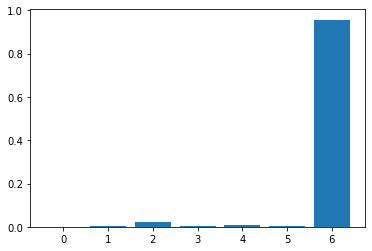

In [257]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

As we have been emphasising previously, <b>distance</b> plays the most important role in determining fare

<h2><li>Random Forest</h2>

In [178]:
fit_RF = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)

In [179]:
pred_train_RF = fit_RF.predict(X_train) # First we'll predict on train data

In [180]:
pred_test_RF = fit_RF.predict(X_test) # Now we'll predict on test data

<h4>Mean Squared Error</h4>

In [181]:
MSE_train_RF = mean_squared_error(y_train, pred_train_RF) # Calculating the MSE for train dataset

In [182]:
MSE_test_RF = mean_squared_error(y_test, pred_test_RF) # Calculating the MSE for test dataset

In [183]:
MSE_train_RF # Mean Squared Error for train dataset is 0.0088

0.008854262943236105

In [184]:
MSE_test_RF # Mean Squared Error for test dataset is 0.614

0.061411139201932405

<h4>Root Mean Squared Error</h4>

In [185]:
RMSE_train_RF = np.sqrt(MSE_train_RF) # Calculating the RMSE for train dataset

In [186]:
RMSE_test_RF = np.sqrt(MSE_test_RF) # Calculating the RMSE for test dataset

In [187]:
RMSE_train_RF # Mean Squared Error for train dataset is 0.094

0.09409709317102259

In [188]:
RMSE_test_RF # Mean Squared Error for train dataset is 0.247

0.24781270992814797

<h4>R-Squared</h4>

In [189]:
r2_score(y_train, pred_train_RF) # Calculating R-squared for train dataset

0.9706265191540955

In [190]:
r2_score(y_test, pred_test_RF) # Calculating R-squared for test dataset

0.7851089131201121

We have now built the 2 basic ensemble models of Regression Trees and Random Forest. We'll now build more advanced and fine tuned Gradient Boost on top of our regression tree model as it will build a model on the weak learners of previous model and try and minimise the error, thus improving our RMSE and R2 vaules.

<h2><li>Gradient Boosting</li></h2>

In [197]:
from sklearn.ensemble import GradientBoostingRegressor

fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

In [198]:
pred_train_GB = fit_GB.predict(X_train) # First we'll predict on train data

In [199]:
pred_test_GB = fit_GB.predict(X_test) # Now we'll predict on test data

<h4>Mean Squared Error</h4>

In [200]:
MSE_train_GB = mean_squared_error(y_train, pred_train_GB) # Calculating the MSE for train dataset

In [201]:
MSE_test_GB = mean_squared_error(y_test, pred_test_GB) # Calculating the MSE for test dataset

In [202]:
MSE_train_GB # The MSE for the train dataset is 0.050

0.05031779106494137

In [203]:
MSE_test_GB # The MSE for the test dataset is 0.056

0.05696230366252487

<h4>Root Mean Squared Error</h4>

In [204]:
RMSE_train_GB = np.sqrt(MSE_train_GB) # Calculating the RMSE for train dataset

In [205]:
RMSE_test_GB = np.sqrt(MSE_test_GB) # Calculating the RMSE for test dataset

In [206]:
RMSE_train_GB # The RMSE for the train dataset is 0.224

0.22431627463236226

In [207]:
RMSE_test_GB # The RMSE for the test dataset is 0.238

0.23866776837797948

<h4>R-Squared</h4>

In [208]:
r2_score(y_train, pred_train_GB) # Calculating R-squared for train dataset

0.8330737768316047

In [209]:
r2_score(y_test, pred_test_GB) # Calculating R-squared for test dataset

0.8006763674425207

We have completed our modelling, however even though our models have been able to achieve a good R2 value, there is a possibility to improve on it with fine tuning the hyperparameters for RF and GB models.

<h3>Hyperparameter tuning for Random Forest</h3><br>

We'll be tuning our RF model with the follwing parameters:<br>
<li><b>max_depth</b> - defines the growth of tree, i.e. longest path between root and leaf node.</li>
<li><b>n_estimators</b> - defining the no. of trees to be included in our forest for maximum iterations.</li>
<li><b>max_features</b> - defines the number of features to be provided to each tree in our forest.</li>

We'll tune our RF model with both Randomized Search CV as well as Grid Search CV<br>
<li><b>Randomized Search CV - Random Forest</b></li>

In [265]:
# We'll first define our RF regressor & also define our hyperparameters to be tuned
model = RandomForestRegressor()
n_estimators = [10, 100, 400] # n_estimators to be iterated between 10 to 400 trees
max_features = [1, 2, 3] # We've already identified, only distance feature is contributing towards our prediction
max_depth = [5, 7, 9] # Our initial RF model showed best result at depth =7

In [267]:
# Next we'll define our grids with our created lists of hyperparameters
grid = dict(n_estimators=n_estimators,max_features=max_features,max_depth=max_depth)
# Then we'll define our Random search object with cross validation
RS_RF = RandomizedSearchCV(model, param_distributions = grid, n_iter = 5, cv = 5, random_state=0)
# model --> The RF regressor model
# param_distributions --> The grid list to hyperparameters
# n_iter --> The no. of parameter settings which are sampled 5 times
# cv --> Cross validations with stratified-K-folds, 5 in our case, maintaining the percentage of samples in each fold
RS_RF = RS_RF.fit(X_train,y_train) # Fit the hyperparamater tuned model
pred_model = RS_RF.predict(X_test) # Predict the tuned model with test data

In [268]:
BP = RS_RF.best_params_ # Storing the best parameters values after cross validations

In [270]:
BP # Listing the best parameter values at n_estimators = 3, max_features = 3, max_depth =9

{'n_estimators': 10, 'max_features': 3, 'max_depth': 9}

In [271]:
BE = RS_RF.best_estimator_ # Storing the best estimator values after cross validations

In [272]:
BE # Listing the best estimator values at n_estimators = 10, max_features = 3, max_depth =9

RandomForestRegressor(max_depth=9, max_features=3, n_estimators=10)

In [273]:
pred_model = BE.predict(X_test) # Predicting the tuned model with test data

<h4>Root Mean Squared Error</h4>

In [277]:
RMSE_RS = np.sqrt(mean_squared_error(y_test,pred_model)) # Calculating the RMSE for test data

In [278]:
RMSE_RS # The RMSE for tuned model with 3 hyperparameters is 0.249

0.24931106497123418

<h4>R-Sqaured</h4>

In [275]:
r2_score(y_test, pred_model) # Calculating the R-squared for test data

0.7825024564096439

<li><b>Grid Search CV - Random Forest</b></li>

In [279]:
# We'll first define our RF regressor & also define our hyperparameters to be tuned
model1 = RandomForestRegressor()
n_estimators = [50, 150, 250] # n_estimators to be iterated between 50 to 250 trees
max_features = [2, 3, 4] # We've already identified, only distance feature is contributing towards our prediction
max_depth = [7, 9, 11] # Our initial RF model showed best result at depth =7

In [281]:
# Next we'll define our grids with our created lists of hyperparameters
grid_GS = dict(n_estimators=n_estimators,max_features=max_features,max_depth=max_depth)
# Then we'll define our Grid search object with cross validation
GS_RF = GridSearchCV(model1, param_grid = grid_GS, cv = 5)
# model1 --> The RF regressor model
# param_grid --> The grid list to hyperparameters
# cv --> Cross validations with stratified-K-folds, 5 in our case, maintaining the percentage of samples in each fold
GS_RF = GS_RF.fit(X_train,y_train) # Fit the hyperparamater tuned model
pred_model1 = GS_RF.predict(X_test) # Predict the tuned model with test data

In [282]:
BP1 = GS_RF.best_params_ # Storing the best parameters values after cross validations

In [283]:
BP1 # Listing the best parameter values at n_estimators = 250, max_features = 4, max_depth =9

{'max_depth': 9, 'max_features': 4, 'n_estimators': 250}

In [284]:
BE1 = GS_RF.best_estimator_ # Storing the best estimator values after cross validations

In [285]:
BE1 # Listing the best parameter values at n_estimators = 250, max_features = 4, max_depth =9

RandomForestRegressor(max_depth=9, max_features=4, n_estimators=250)

In [286]:
pred_model1 = BE1.predict(X_test) # Predicting the tuned model with test data

<h4>Root Mean Squared Error</h4>

In [287]:
RMSE_GS = np.sqrt(mean_squared_error(y_test,pred_model1)) # Calculating the RMSE for test data

In [288]:
RMSE_GS # The RMSE for tuned model with 3 hyperparameters is 0.243

0.24293971015808039

<h4>R-Squared</h4>

In [289]:
r2_score(y_test, pred_model1) # Calculating the R-squared for test data

0.7934770753196227

With this, we have successfully built Random Search CV and Grid Search CV for our Random Forest model. We'll now repeat the same for our Gradient Boosting model.

<li><b>Random Search CV - Gradient Boosting</b></li>

In [290]:
# We'll first define our RF regressor & also define our hyperparameters to be tuned
model2 = GradientBoostingRegressor(random_state = 98)
n_estimators = [10, 100, 400] # n_estimators to be iterated between 10 to 400 trees
max_features = [1, 2, 3] # We've already identified, only distance feature is contributing towards our prediction
max_depth = [5, 7, 9]

In [291]:
# Next we'll define our grids with our created lists of hyperparameters
grid = dict(n_estimators=n_estimators,max_features=max_features,max_depth=max_depth)
# Then we'll define our Random search object with cross validation
RS_GB = RandomizedSearchCV(model2, param_distributions = grid, n_iter = 5, cv = 5, random_state=0)
# model2 --> The RF regressor model
# param_distributions --> The grid list to hyperparameters
# n_iter --> The no. of parameter settings which are sampled 5 times
# cv --> Cross validations with stratified-K-folds, 5 in our case, maintaining the percentage of samples in each fold
RS_GB = RS_GB.fit(X_train,y_train) # Fit the hyperparamater tuned model
pred_model2 = RS_GB.predict(X_test) # Predict the tuned model with test data

In [292]:
BP_GB = RS_GB.best_params_ # Storing the best parameters values after cross validations

In [293]:
BP_GB # Listing the best parameter values at n_estimators = 400, max_features = 2, max_depth =5

{'n_estimators': 400, 'max_features': 2, 'max_depth': 5}

In [294]:
BE_GB = RS_GB.best_estimator_ # Storing the best estimator values after cross validations

In [295]:
BE_GB # Listing the best estimator values at n_estimators = 400, max_features = 2, max_depth =5

GradientBoostingRegressor(max_depth=5, max_features=2, n_estimators=400,
                          random_state=98)

In [296]:
pred_model2 = BE_GB.predict(X_test) # Predicting the tuned model with test data

<h4>Root Mean Squared Error</h4>

In [297]:
RMSE_RS_GB = np.sqrt(mean_squared_error(y_test,pred_model2)) # Calculating the RMSE for test data

In [298]:
RMSE_RS_GB # The RMSE for tuned model with 3 hyperparameters is 0.242

0.24281415283949087

<h4>R-Squared</h4>

In [299]:
r2_score(y_test, pred_model2) # Calculating the R-squared for test data

0.7936904925816826

<li><b>Grid Search CV - Gradient Boosting</b></li>

In [300]:
# We'll first define our RF regressor & also define our hyperparameters to be tuned
model3 = GradientBoostingRegressor(random_state = 98)
n_estimators = [50, 150, 250] # n_estimators to be iterated between 50 to 250 trees
max_features = [2, 3, 4] # We've already identified, only distance feature is contributing towards our prediction
max_depth = [7, 9, 11] # Our initial GB model showed best result at depth =5

In [301]:
# Next we'll define our grids with our created lists of hyperparameters
grid_GS = dict(n_estimators=n_estimators,max_features=max_features,max_depth=max_depth)
# Then we'll define our Grid search object with cross validation
GS_GB = GridSearchCV(model3, param_grid = grid_GS, cv = 5)
# model1 --> The RF regressor model
# param_grid --> The grid list to hyperparameters
# cv --> Cross validations with stratified-K-folds, 5 in our case, maintaining the percentage of samples in each fold
GS_GB = GS_GB.fit(X_train,y_train) # Fit the hyperparamater tuned model
pred_model3 = GS_GB.predict(X_test) # Predict the tuned model with test data

In [302]:
BP_GB1 = GS_GB.best_params_ # Storing the best parameters values after cross validations

In [303]:
BP_GB1 # Listing the best parameter values at n_estimators = 50, max_features = 4, max_depth =7

{'max_depth': 7, 'max_features': 4, 'n_estimators': 50}

In [304]:
BE_GB1 = GS_GB.best_estimator_ # Storing the best estimator values after cross validations

In [305]:
BE_GB1 # Listing the best parameter values at n_estimators = 50, max_features = 4, max_depth =7

GradientBoostingRegressor(max_depth=7, max_features=4, n_estimators=50,
                          random_state=98)

In [306]:
pred_model3 = BE_GB1.predict(X_test) # Predicting the tuned model with test data

<h4>Root Mean Squared Error</h4>

In [307]:
RMSE_GS_GB = np.sqrt(mean_squared_error(y_test,pred_model3)) # Calculating the RMSE for test data

In [308]:
RMSE_GS_GB # The RMSE for tuned model with 3 hyperparameters is 0.241

0.2417882838487584

<h4>R-Squared</h4>

In [309]:
r2_score(y_test, pred_model3) # Calculating the R-squared for test data

0.7954300899607044

This concludes our modelling, basic as well as advanced. Let us now evaluate our model performance by validating it on our test data file

In [322]:
# We'll now compare all our models & evaluate their performance in order to decide which one performed the best

train_errors = [RMSE_train, RMSE_train_RT1, RMSE_train_RF, RMSE_train_GB]
test_errors = [RMSE_test, RMSE_test_RT1, RMSE_test_RF, RMSE_test_GB]

col = {'RMSE Errors - Train':train_errors, 'RMSE Errors - Test':test_errors}
models = ['Linear Regression','Regression Tree', 'Random Forest', 'Gradient Boost']
summary = pd.DataFrame(data=col,index=models).round(3)


In [323]:
summary # Dataframe showing comparison of all models

,RMSE Errors - Train,RMSE Errors - Test
Linear Regression,0.274,0.255
Regression Tree,0.246,0.251
Random Forest,0.094,0.248
Gradient Boost,0.224,0.239


<AxesSubplot:>

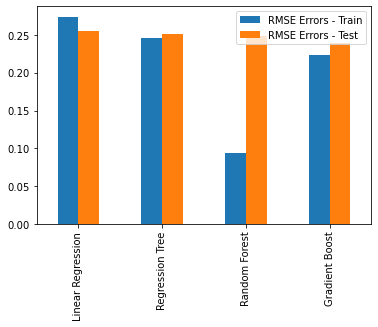

In [324]:
summary.plot(kind='bar') # Plotting the errors from our models

In [325]:
error_tuned_models = [RMSE_RS, RMSE_GS, RMSE_RS_GB, RMSE_GS_GB]

col1 = {'RMSE Errors - Tuned':error_tuned_models}
models1 = ['RF - Random Search CV', 'RF - Grid Search CV', 'GB - Random Search CV', 'GB - Grid Search CV']
summary1 = pd.DataFrame(data=col1, index=models1).round(3)

In [326]:
summary1 # Dataframe showing comparison of tuned models

,RMSE Errors - Tuned
RF - Random Search CV,0.249
RF - Grid Search CV,0.243
GB - Random Search CV,0.243
GB - Grid Search CV,0.242


<AxesSubplot:>

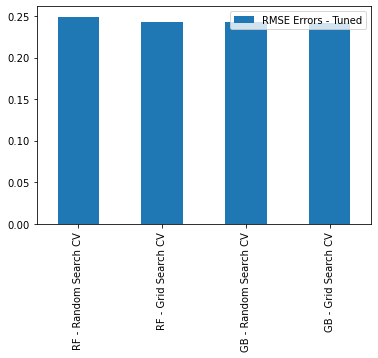

In [327]:
summary1.plot(kind='bar') # Plotting the errors from our models

Finally, we'll apply the RF_model with Grid Search CV to our test data

In [335]:
# We'll first define our RF regressor & also define our hyperparameters to be tuned
final_model = RandomForestRegressor()
n_estimators = [50, 150, 250] # n_estimators to be iterated between 50 to 250 trees
max_features = [2, 3, 4] # We've already identified, only distance feature is contributing towards our prediction
max_depth = [7, 9, 11] # Our initial RF model showed best result at depth =7

In [336]:
# Next we'll define our grids with our created lists of hyperparameters
grid_GS_RF = dict(n_estimators=n_estimators,max_features=max_features,max_depth=max_depth)
# Then we'll define our Grid search object with cross validation
GS_RF_1 = GridSearchCV(final_model, param_grid = grid_GS_RF, cv = 5)
# final_model --> The RF regressor model
# param_grid --> The grid list to hyperparameters
# cv --> Cross validations with stratified-K-folds, 5 in our case, maintaining the percentage of samples in each fold
GS_RF_1 = GS_RF_1.fit(X_train,y_train) # Fit the hyperparamater tuned model
BP_GS_RF = GS_RF_1.best_params_ # Storing the best parameters values after cross validations

pred_model_final = GS_RF_1.predict(test_cab) # Predicting the tuned model with test data

In [337]:
pred_model_final

array([2.38491454, 2.40443347, 1.73840618, ..., 3.85830206, 3.22940652,
       2.0191028 ])

In [338]:
test_cab['predicted_fare'] = pred_model_final

In [339]:
test_cab.head()

,passenger_count,pickup_day,pickup_year,pickup_dow,pickup_hour,pickup_month,distance,predicted_fare
0,1,27,2015,1,13,1,1.200946,2.384915
1,1,27,2015,1,13,1,1.231205,2.404433
2,1,8,2011,5,11,10,0.481579,1.738406
3,1,1,2012,5,21,12,1.085538,2.271328
4,1,1,2012,5,21,12,1.854312,2.833412


In [340]:
test_cab.to_csv('test_cab_predicted.csv')